<a href="https://colab.research.google.com/github/RafsanJany-44/Research_Sleep_Stage_Classification/blob/main/XG_Boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/RafsanJany-44/Thesis_Project/main/All_DATA/without_sn_and_Epoch/EEG_HMC.csv')

print(dataset.head())
#from sklearn.preprocessing import LabelEncoder
#encoder=LabelEncoder()
#dataset["Sleep Stage"]=encoder.fit_transform(dataset["Sleep Stage"])



  Sleep Stage  MeanP_Alpha_F4  MedianF_Alpha_F4  MeanF_Alpha_F4  \
0           W         0.00051           8.74146        18.48195   
1           W         0.00040          10.24000        17.48293   
2           W         0.00036           9.74049        17.98244   
3           W         0.00035          10.11512        17.60780   
4           W         0.00033           9.74049        17.60780   

   Spectral Edge_Alpha_F4  PeakF_Alpha_F4  MeanP_Beta_F4  MedianF_Beta_F4  \
0                17.48293         8.24195        0.00071         19.73073   
1                16.85854        10.61463        0.00051         17.23317   
2                17.48293         8.74146        0.00047         17.60780   
3                17.10829         9.61561        0.00047         17.35805   
4                17.23317         8.11707        0.00043         17.23317   

   MeanF_Beta_F4  Spectral Edge_Beta_F4  ...  MeanP_Delta_O2  \
0       29.84585               33.84195  ...         0.00724   
1     

In [4]:
X= dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)

X_test =sc.fit_transform(X_test)

In [7]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=25
k_range = range (8,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))

8/9 round completed......................... Accurecy: 0.7459775943939883
9/9 round completed......................... Accurecy: 0.7563505601401503


Text(0, 0.5, 'Testing Accuracy')

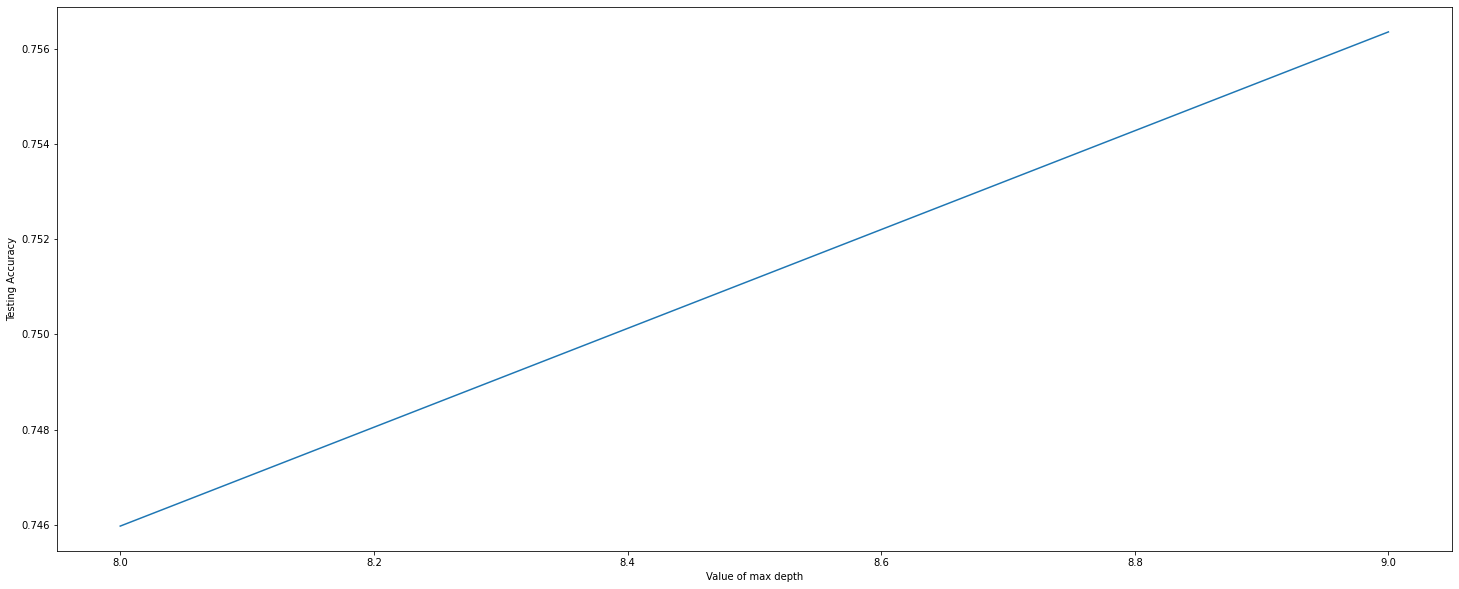

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of max depth')
plt.ylabel ('Testing Accuracy')

In [9]:
print("The best max depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

The best max depth:
9


In [10]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)
predictions = xgb_classifier.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))
print("Accurecy: ",accuracy_score(y_test, predictions))

[[ 375  837   29  251  876]
 [ 106 6361  841  157  426]
 [   6  975 3180    1   92]
 [ 167 1380   73 1536  218]
 [ 119  184   21   38 3442]]
              precision    recall  f1-score   support

          N1       0.49      0.16      0.24      2368
          N2       0.65      0.81      0.72      7891
          N3       0.77      0.75      0.76      4254
           R       0.77      0.46      0.57      3374
           W       0.68      0.90      0.78      3804

    accuracy                           0.69     21691
   macro avg       0.67      0.61      0.61     21691
weighted avg       0.68      0.69      0.66     21691

Accurecy:  0.6866442303259417


Text(114.0, 0.5, 'Truth')

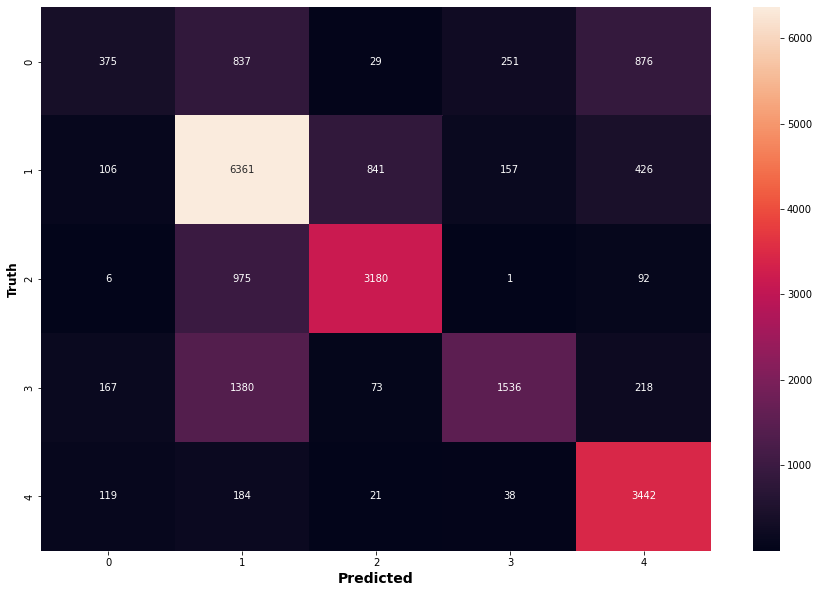

In [12]:
cm = confusion_matrix(y_test, predictions)
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
sn.heatmap(cm, annot=True, fmt='d') # here, cm is called to be visualized
plt.xlabel('Predicted',fontsize=14.0, fontweight='bold')
plt.ylabel('Truth',fontsize=12.0, fontweight='bold')

In [13]:
def confusion_details(y_test,y_pred):
    labels = list(set(y_test))
    labels.sort()

    print("Total labels: %s -> %s" % (len(labels), labels))

    df = pd.DataFrame(
        data=confusion_matrix(y_test, y_pred, labels=labels),
        columns=labels,
        index=labels
    )

    print(df)

    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Local (metrics per class)
    #
    tps = {}
    fps = {}
    fns = {}
    tns = {}

    precision_local = {}
    recall_local = {}
    f1_local = {}
    accuracy_local = {}
    specificity_local={}

    for label in labels:
        tps[label] = df.loc[label, label]
        fps[label] = df[label].sum() - tps[label]
        fns[label] = df.loc[label].sum() - tps[label]
        tns[label]=len(y_test) - (tps[label] + fps[label] + fns[label])
        
        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
        
        precision_local[label] = tp / (tp + fp) if (tp + fp) > 0. else 0.
        specificity_local[label] = tn / (tn + fp) if (tn + fp) > 0. else 0.
        recall_local[label] = tp / (tp + fn) if (tp + fp) > 0. else 0.
        p, r = precision_local[label], recall_local[label]
        
        f1_local[label] = 2. * p * r / (p + r) if (p + r) > 0. else 0.
        accuracy_local[label] = tp / (tp + fp + fn) if (tp + fp + fn) > 0. else 0.



    print("#-- Local measures --#")
    print("True Positives(TP):", tps)
    print("False Positives(FP):", fps)
    print("True Negatives(TN):", tns)
    print("False Negatives(FN):", fns)
    print("----------------------------")

    print("Precision:", precision_local)
    print("Recall/Sensitivity:", recall_local)
    print("Specificity:",specificity_local)
    print("F1-Score:", f1_local)
    print("Accuracy:", accuracy_local)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Global
    #
    micro_averages = {}
    macro_averages = {}

    correct_predictions = sum(tps.values())
    true_negative=sum(tns.values())

    den = sum(list(tps.values()) + list(fps.values()))
    micro_averages["Precision"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tps.values()) + list(fns.values()))
    micro_averages["Recall"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tns.values()) + list(fps.values()))
    micro_averages["Specificity"] = 1. * true_negative / den if den > 0. else 0.


    micro_avg_p, micro_avg_r = micro_averages["Precision"], micro_averages["Recall"]
    micro_averages["F1-score"] = 2. * micro_avg_p * micro_avg_r / (micro_avg_p + micro_avg_r) if (micro_avg_p + micro_avg_r) > 0. else 0.

    macro_averages["Precision"] = np.mean(list(precision_local.values()))
    macro_averages["Recall"] = np.mean(list(recall_local.values()))
    macro_averages["Specificity"]=np.mean(list(specificity_local.values()))


    macro_avg_p, macro_avg_r = macro_averages["Precision"], macro_averages["Recall"]
    macro_averages["F1-Score"] = 2. * macro_avg_p * macro_avg_r / (macro_avg_p + macro_avg_r) if (macro_avg_p + macro_avg_r) > 0. else 0.

    total_predictions = df.values.sum()
    accuracy_global = correct_predictions / total_predictions if total_predictions > 0. else 0.

    print("#-- Global measures --#")
    print("Micro-Averages:", micro_averages)
    print("Macro-Averages:", macro_averages)
    print("Correct predictions:", correct_predictions)
    print("Total predictions:", total_predictions)
    print("Accuracy:", accuracy_global)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()



    accuracy_local_new = {}
    for label in labels:
        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
        accuracy_local_new[label] = (tp + tn) / (tp + fp + fn + tn) if (tp + fp + fn + tn) > 0. else 0.

    total_true = sum(list(tps.values()) + list(tns.values()))
    total_predictions = sum(list(tps.values()) + list(tns.values()) + list(fps.values()) + list(fns.values()))
    accuracy_global_new = 1. * total_true / total_predictions if total_predictions > 0. else 0.

    print("Accuracy (per class), with TNs:", accuracy_local_new)
    print("Accuracy (per class), without TNs:", accuracy_local)
    print("Accuracy (global), with TNs:", accuracy_global_new)
    print("Accuracy (global), without TNs:", accuracy_global)

In [14]:
confusion_details(y_test,predictions)

Total labels: 5 -> ['N1', 'N2', 'N3', 'R', 'W']
     N1    N2    N3     R     W
N1  375   837    29   251   876
N2  106  6361   841   157   426
N3    6   975  3180     1    92
R   167  1380    73  1536   218
W   119   184    21    38  3442

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

#-- Local measures --#
True Positives(TP): {'N1': 375, 'N2': 6361, 'N3': 3180, 'R': 1536, 'W': 3442}
False Positives(FP): {'N1': 398, 'N2': 3376, 'N3': 964, 'R': 447, 'W': 1612}
True Negatives(TN): {'N1': 18925, 'N2': 10424, 'N3': 16473, 'R': 17870, 'W': 16275}
False Negatives(FN): {'N1': 1993, 'N2': 1530, 'N3': 1074, 'R': 1838, 'W': 362}
----------------------------
Precision: {'N1': 0.4851228978007762, 'N2': 0.6532812981411112, 'N3': 0.7673745173745173, 'R': 0.7745839636913767, 'W': 0.6810447170557974}
Recall/Sensitivity: {'N1': 0.15836148648648649, 'N2': 0.80610822455962